In [1]:
# General Imports
import geopandas as gpd #pip install geopandas descartes
import pandas as pd #pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
import numpy as np
import os

# from multiprocessing import Pool
# from dbfread import DBF #pip install dbfread
# from simpledbf import Dbf5 #pip install simpledbf

In [2]:
# Read 'linhatrem' lines shape file
def read_shape(shapefile):
    # Read the shapefile pointed in the spec.json
    print("Reading shapefile: ", shapefile)
    zones_shape = gpd.read_file(shapefile, encoding='latin')
    zones_shape.crs = {'init': 'epsg:22523'}
    print("Current projection: ", zones_shape.crs)

    projection = {'proj': 'longlat', 'ellps': 'WGS84', 'no_defs': True}

    # Change projection for long/lat if different and save to new file
    if(zones_shape.crs != projection):
        print("Changing projection.\n")
        zones_shape.to_crs(projection, inplace=True)
        print("New projection: ", zones_shape.crs)
        print("Written to ", os.path.dirname(shapefile) + '_modified\n\n')
        zones_shape.to_file(os.path.dirname(shapefile) + '_modified')

    return zones_shape

Reading shapefile:  ../shapefiles/Metro/Metro.shp


/home/milenacsilva/Área de Trabalho/ic/env/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Current projection:  +init=epsg:22523 +type=crs
Changing projection.

New projection:  +proj=longlat +ellps=WGS84 +no_defs +type=crs
Written to  ../shapefiles/Metro_modified


Reading shapefile:  ../shapefiles/Ubs/Ubs.shp
Current projection:  +init=epsg:22523 +type=crs
Changing projection.

New projection:  +proj=longlat +ellps=WGS84 +no_defs +type=crs
Written to  ../shapefiles/Ubs_modified




/home/milenacsilva/Área de Trabalho/ic/env/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


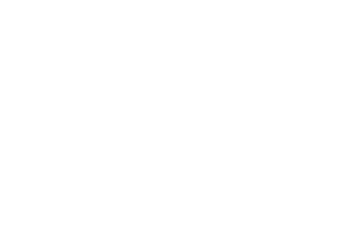

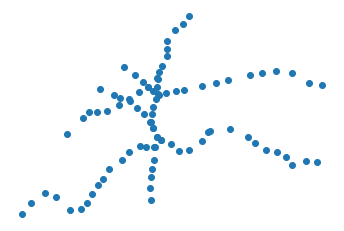

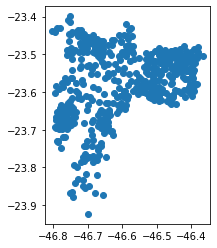

In [4]:
MAPS_DIR='../new_maps/'
SHAPEFILES_DIR='../shapefiles/'

# areas = [
#     'Centro',
#     'Oeste',
#     'Sul1',
#     'Sul2',
#     'Norte1',
#     'Norte2',
#     'Leste1',
#     'Leste2'
# ]

areas = [
    'Metro',
    'Ubs'
]

for area in areas:
    original = read_shape(f'{SHAPEFILES_DIR}{area}/{area}.shp')
    plt.axis('off')
    original.plot()